In [22]:
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import pandas as pd
import pickle 
import os
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import cm

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sns.set_theme()
np.random.seed(0)

In [3]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (3, 1), (3,2), (5,6)])

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (1, 3), (3,4)])

In [ ]:
G1 = nx.Graph()
G1.add_edges_from([(1, 1), (5,6)])

In [4]:
edges_1 = set(G1.edges())

edges_2 = set(G2.edges())

intersecting_edges = edges_1 & edges_2
print("Intersecting Edges:", intersecting_edges)

edges_1_disjoint = edges_1 - intersecting_edges
print("Edge 1 Disjoints:", edges_1_disjoint)

edges_2_disjoint = edges_2 - intersecting_edges
print("Edge 2 Disjoints:", edges_2_disjoint)

Intersecting Edges: {(1, 2), (1, 3)}
Edge 1 Disjoints: {(5, 6), (2, 3)}
Edge 2 Disjoints: {(3, 4)}


In [5]:
G1.degree

DegreeView({1: 2, 2: 2, 3: 2, 5: 1, 6: 1})

In [6]:
nx.write_edgelist(G1, "test.edgelist")

In [7]:
G = nx.path_graph(4)
nx.write_edgelist(G, "test.edgelist")
G = nx.path_graph(4)
fh = open("test.edgelist", "wb")
nx.write_edgelist(G, fh)
nx.write_edgelist(G, "test.edgelist.gz")
nx.write_edgelist(G, "test.edgelist.gz", data=False)

In [8]:
G = nx.Graph()
G.add_edge(1, 2, weight=6)
G.add_edge(5, 8, weight=43)
G.add_edge(6, 5, weight=17)
G.add_edge(1, 4, weight=7)

fh = "test.weighted.edgelist"

nx.write_weighted_edgelist(G, fh)
G3=nx.read_weighted_edgelist(fh)

In [9]:
edges_1 = set(G1.nodes())

edges_2 = set(G2.nodes())

intersecting_edges = edges_1 & edges_2
print("Intersecting Edges:", intersecting_edges)

edges_1_disjoint = edges_1 - intersecting_edges
print("Edge 1 Disjoints:", edges_1_disjoint)

edges_2_disjoint = edges_2 - intersecting_edges
print("Edge 2 Disjoints:", edges_2_disjoint)

Intersecting Edges: {1, 2, 3}
Edge 1 Disjoints: {5, 6}
Edge 2 Disjoints: {4}


In [ ]:
G = nx.karate_club_graph()

for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(0,10)


In [19]:
import algorithmx

In [20]:

# https://algorithmx-python.readthedocs.io/en/latest/examples/networkx-tutorial.html
import algorithmx

G = nx.gnp_random_graph(10, 0.3, 138)

canvas = algorithmx.jupyter_canvas()
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add()
    
#G = nx.gnp_random_graph(10, 0.3, 201)
#nx.set_edge_attributes(G, {e: {'weight': randint(1, 10)} for e in G.edges})


coloring = nx.greedy_color(G)
centrality = nx.edge_betweenness_centrality(G, weight='weight', normalized=True)

canvas = algorithmx.jupyter_canvas()

canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add()
    
formatted_centrality = {k: '{0:.2f}'.format(v) for k, v in centrality.items()}

init_edges.label().add().text(lambda e: G.edges[e]['weight'])

init_edges.label('centrality').add().color('blue').text(lambda e: formatted_centrality[e])
    
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

NameError: name 'init_edges' is not defined

In [56]:
dict(nx.all_pairs_shortest_path(G))

{1: {1: [1], 2: [1, 2], 4: [1, 4]},
 2: {2: [2], 1: [2, 1], 4: [2, 1, 4]},
 5: {5: [5], 8: [5, 8], 6: [5, 6]},
 8: {8: [8], 5: [8, 5], 6: [8, 5, 6]},
 6: {6: [6], 5: [6, 5], 8: [6, 5, 8]},
 4: {4: [4], 1: [4, 1], 2: [4, 1, 2]}}

In [32]:
import requests
from matplotlib import cm

protein_list = ['GAPDH','RAD9A','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','GABBR1']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

In [33]:
r

<Response [200]>

In [34]:
lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']]  
interactions

,preferredName_A,preferredName_B,score
0,HTR2C,GABBR1,0.418
1,HTR2C,GABBR1,0.418
2,HTR2C,SLC18A2,0.526
3,HTR2C,SLC18A2,0.526
4,HTR2C,TPH2,0.644
5,HTR2C,TPH2,0.644
6,HTR2C,MAOA,0.704
7,HTR2C,MAOA,0.704
8,HTR2C,HTR2A,0.91
9,HTR2C,HTR2A,0.91


In [35]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

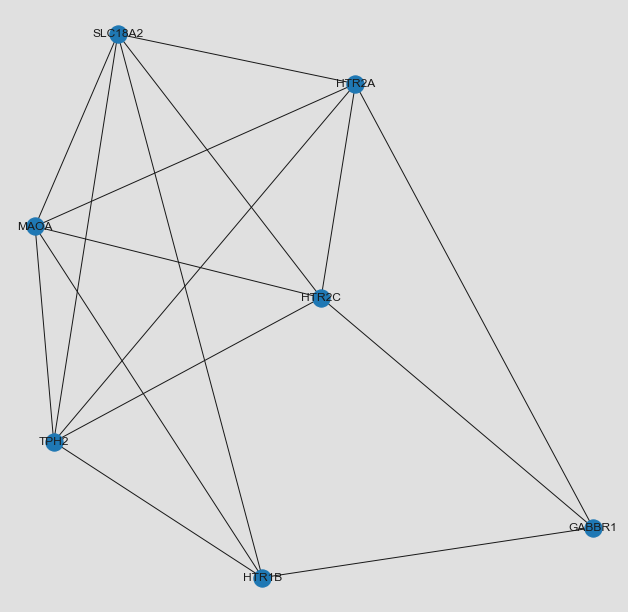

In [36]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [37]:
# betweenness centrality
# https://towardsdatascience.com/visualizing-protein-networks-in-python-58a9b51be9d5

# The betweenness centrality of a given node is the measure of the number of shortest paths that pass through that node out of all of the shortest paths.

"""
The following code uses the degree and betweenness centrality of each node to determine its color and 
size and uses the edge weights to determine the color and size of the edges.
"""

# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]
# use the matplotlib plasma colormap
graph_colormap = cm.get_cmap('plasma', 12)
# node color varies with Degree
c = rescale([G.degree(v) for v in G],0.0,0.9) 
c = [graph_colormap(i) for i in c]
# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],1500,7000)
# edge width shows 1-weight to convert cost back to strength of interaction 
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
# edge color also shows weight
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec = [graph_colormap(i) for i in ec]

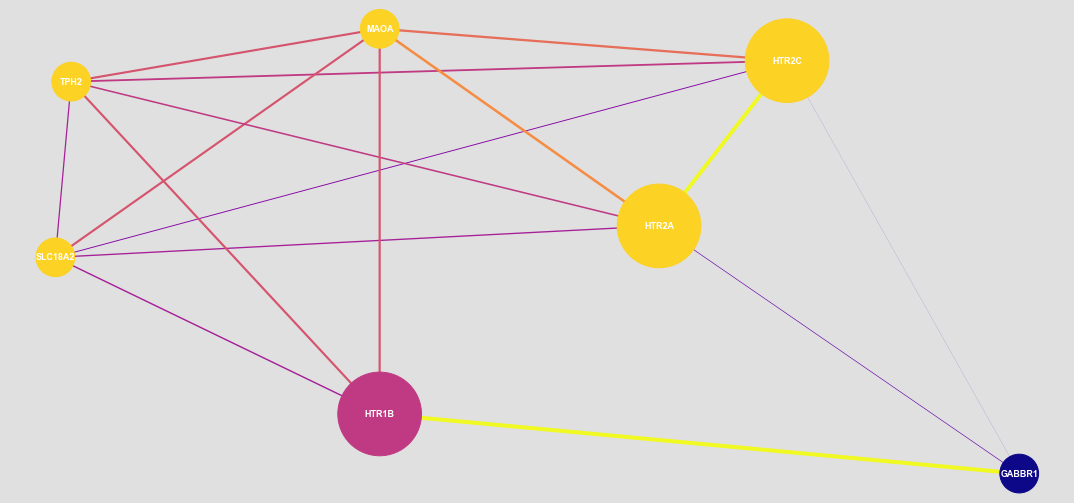

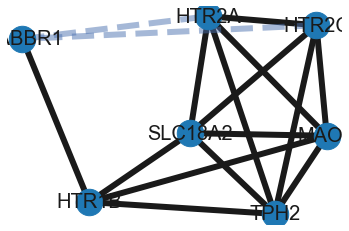

In [38]:
pos = nx.spring_layout(G)
plt.figure(figsize=(19,9),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='white',font_weight='bold',font_size='9')
plt.axis('off')
plt.show()


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

# The color range goes from dark purple to bright yellow. The yellower the node, the higher the degree. 
# The larger the node, the greater the betweenness centrality. The yellower and wider the edge, the greater the interaction score.

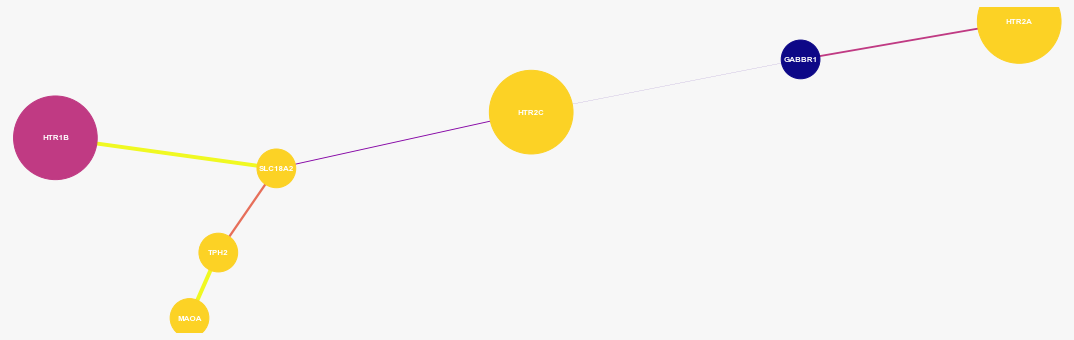

In [39]:
# MST

T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T)
plt.figure(figsize=(19,6),facecolor=[0.7,0.7,0.7,0.1])
nx.draw_networkx(T, pos=pos, with_labels=True,node_color=c,node_size=s,edge_color= ec,width=ew,
                font_color='white',font_weight='bold',font_size='8')
plt.axis('off')
plt.show()

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 3: 1, 5: 1, 0: 2, 1: 2, 2: 2, 6: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 8: 2, 4: 2, 9: 3, 3: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 8: 1, 6: 1, 9: 2, 5: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 9: 1, 7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


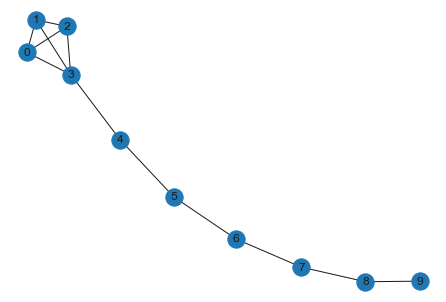

In [43]:
import matplotlib.pyplot as plt
from networkx import nx

G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

nx.draw(G, with_labels=True)
plt.show()

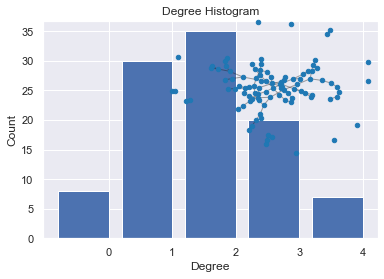

In [44]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

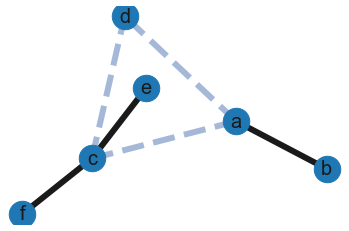

In [53]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

{'a': {'a': ['a'],
  'b': ['a', 'b'],
  'c': ['a', 'c'],
  'd': ['a', 'd'],
  'e': ['a', 'c', 'e'],
  'f': ['a', 'c', 'f']},
 'b': {'b': ['b'],
  'a': ['b', 'a'],
  'c': ['b', 'a', 'c'],
  'd': ['b', 'a', 'd'],
  'e': ['b', 'a', 'c', 'e'],
  'f': ['b', 'a', 'c', 'f']},
 'c': {'c': ['c'],
  'a': ['c', 'a'],
  'd': ['c', 'd'],
  'e': ['c', 'e'],
  'f': ['c', 'f'],
  'b': ['c', 'a', 'b']},
 'd': {'d': ['d'],
  'c': ['d', 'c'],
  'a': ['d', 'a'],
  'e': ['d', 'c', 'e'],
  'f': ['d', 'c', 'f'],
  'b': ['d', 'a', 'b']},
 'e': {'e': ['e'],
  'c': ['e', 'c'],
  'a': ['e', 'c', 'a'],
  'd': ['e', 'c', 'd'],
  'f': ['e', 'c', 'f'],
  'b': ['e', 'c', 'a', 'b']},
 'f': {'f': ['f'],
  'c': ['f', 'c'],
  'a': ['f', 'c', 'a'],
  'd': ['f', 'c', 'd'],
  'e': ['f', 'c', 'e'],
  'b': ['f', 'c', 'a', 'b']}}

In [47]:
import math

import matplotlib.pyplot as plt
import networkx as nx

# This example needs Graphviz and either PyGraphviz or pydot.
# from networkx.drawing.nx_pydot import graphviz_layout as layout
from networkx.drawing.nx_agraph import graphviz_layout as layout

# If you don't have pygraphviz or pydot, you can do this
# layout = nx.spring_layout


n = 150  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / float(n)

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]

region = 220  # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)
for p in pvals:
    G = nx.binomial_graph(n, p)
    pos = layout(G)
    region += 1
    plt.subplot(region)
    plt.title(f"p = {p:.3f}")
    nx.draw(G, pos, with_labels=False, node_size=10)
    # identify largest connected component
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    nx.draw_networkx_edges(G0, pos, edge_color="r", width=6.0)
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(
                G.subgraph(Gi), pos, edge_color="r", alpha=0.3, width=5.0,
            )
plt.show()

ValueError: Program neato not found in path.

<Figure size 432x288 with 0 Axes>